Greyscale filtering by Allie Wicklund

You will need:  
        -Folders called Filters, Filters_scroll, Tiles, Tiles_scroll in the same path as this notebook  
        -00000.tif in Tiles, Tiles_scroll

Install libraries

In [1]:
!pip install image_slicer

  Using cached Pillow-7.2.0-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.26.0 requires pillow>=8.3.2, but you have pillow 7.2.0 which is incompatible.


In [2]:
!pip install opencv-python

Import libraries

In [3]:
from PIL import Image
import pandas as pd
import seaborn as sb

Cut the first tif into smaller pieces 

In [4]:
import image_slicer
image_slicer.slice('Tiles/00000.tif', 3600);

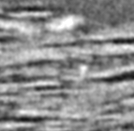

In [5]:
test = Image.open('Tiles/00000_04_32.png')
display(test)

In [6]:
!pip install Pillow==9.5.0

  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.2.0
    Uninstalling Pillow-7.2.0:
      Successfully uninstalled Pillow-7.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
image-slicer 2.1.1 requires Pillow==7.2.0, but you have pillow 9.5.0 which is incompatible.


Finding greyscale values

In [7]:
import cv2
list_greyscale=[]
img = cv2.imread("Tiles/00000_04_32.png", 0) #since the image is grayscale, we need only one channel and the value '0' indicates just that
for i in range (img.shape[0]): #traverses through height of the image
    for j in range (img.shape[1]): #traverses through width of the image
        list_greyscale.append(img[i][j])

In [8]:
print(f'height={i+1},width={j+1}')
print((i+1)*(j+1))
print(len(list_greyscale))

height=131,width=134
17554
17554


Putting values of greyscale into a matrix

In [9]:
n, m = 131, 134
 
k = 0
res = []
if n*m != len(list_greyscale):
 
    # checking if Matrix Possible
    res = "Matrix Not Possible"
else:
 
    # Constructing Matrix
    for idx in range(0, n):
        sub = []
        for jdx in range(0, m):
            sub.append(list_greyscale[k])
            k += 1
        res.append(sub)

Putting the matrix into a data frame

In [10]:
df = pd.DataFrame(res)

In [11]:
#df.head()

This sample filter "removes" values under 100, making them null. This more clearly defines the surface.

In [12]:
light = df.where(df > 100)
#light.head(5)

<Axes: >

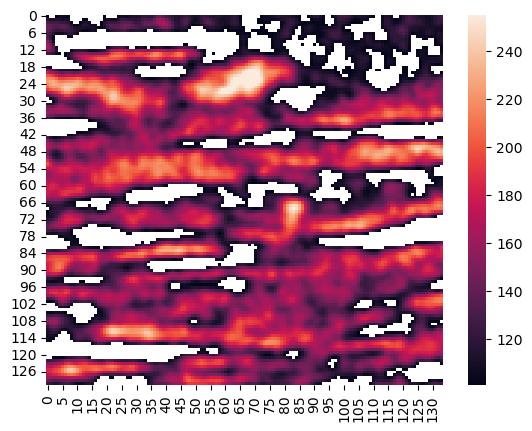

In [13]:
sb.heatmap(light)

Try all filters

/home/ari/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/ari/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


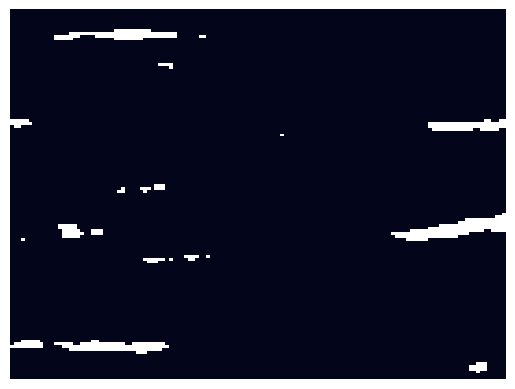

In [14]:
for filter_value in range(60,256):
    filtered = df.where(df > filter_value) 
    heatmap = sb.heatmap(filtered, cbar=False, xticklabels=False, yticklabels=False)
    heatmap.figure.savefig(f"Filters/{filter_value}.tif")

Visually with the filters, 100-120 seems to give the best separation between layers without losing too much scroll.

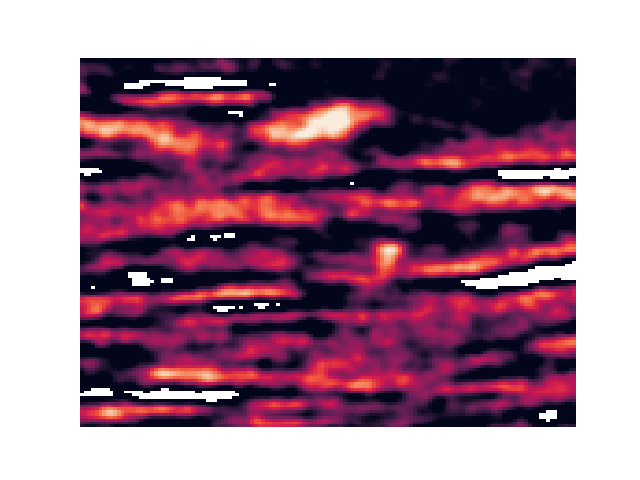

In [15]:
ideal_filter= Image.open('Filters/110.tif')
display(ideal_filter)

In [28]:
'''test = Image.open("00000.tif")
display(test)'''

'test = Image.open("00000.tif")\ndisplay(test)'

Converting scroll data to greyscale. Note: This process may take a while.

In [17]:
from PIL import Image
import pandas as pd
import seaborn as sb

In [18]:
import image_slicer
image_slicer.slice('Tiles_scroll/00000.tif', 25);

In [19]:
import cv2
list_greyscale=[]
img = cv2.imread("Tiles_scroll/00000_02_03.png", 0) 
for k in range (img.shape[0]): 
    for l in range (img.shape[1]):
        list_greyscale.append(img[k][l])

In [20]:
'''print(f'height={k+1},width={l+1}')
print((k+1)*(l+1))
print(len(list_greyscale))'''

"print(f'height={k+1},width={l+1}')\nprint((k+1)*(l+1))\nprint(len(list_greyscale))"

In [21]:
n, m = 1577, 1619
 
k = 0
res = []
if n*m != len(list_greyscale):
 
    # checking if Matrix Possible
    res = "Matrix Not Possible"
else:
 
    # Constructing Matrix
    for kdx in range(0, n):
        sub = []
        for ldx in range(0, m):
            sub.append(list_greyscale[k])
            k += 1
        res.append(sub)

In [22]:
df2 = pd.DataFrame(res)

In [23]:
#df2.head()

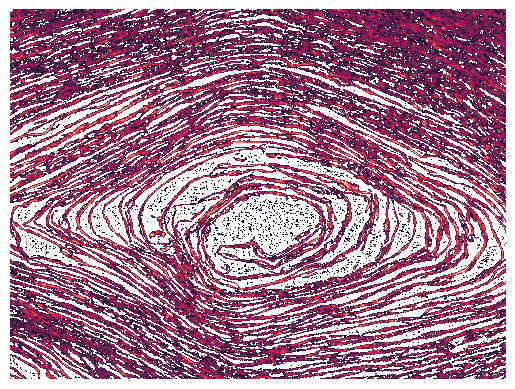

In [24]:
filtered = df2.where(df2 > 110) 
heatmap = sb.heatmap(filtered, cbar=False, xticklabels=False, yticklabels=False)
heatmap.figure.savefig(f"Filters_scroll/110.tif")

The red indicates where the scroll is located. This process is to identify areas for segmentation. It can be run on any of the 25 tiles by switching the name in cv2.imread statement and the filename for savefig.